<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_01_g_h_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import math

import numpy as np

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt


In [10]:
def data_and_noise(x0 = 0, x_dot = 1, std = 1, count = 20):
  xs = np.array([x0 + t * x_dot for t in range(count)])
  noise = np.array(np.random.normal(0, std, count))
  return (xs, xs + noise)
  

In [7]:
def g_h_filter(zs, x0, x_dot0, g, h, dt):
  x = x0
  x_dot = x_dot0

  estimates = []
  for z in zs:
    predicted_x = x + x_dot * dt

    residual = z - predicted_x
    x = predicted_x + g * residual
    x_dot = x_dot + h * residual / dt

    estimates.append(x)

  return np.array(estimates)



In [13]:
actuals, weights = data_and_noise(x0=160, x_dot=1, std=3, count=20)

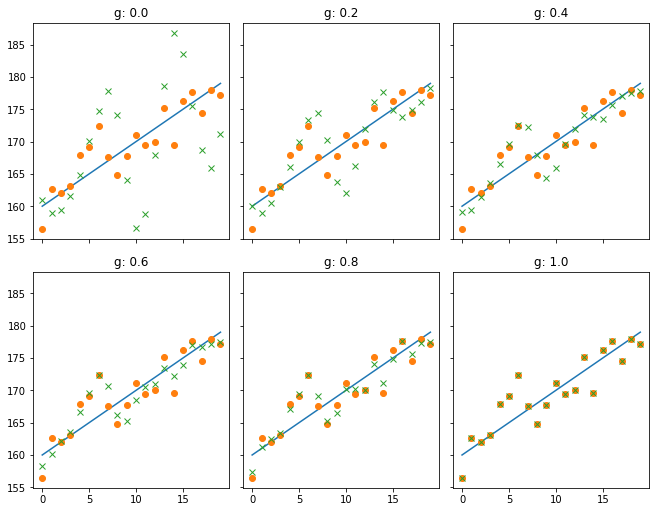

In [14]:
h = 2./3
figure, subplots = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(9, 7), constrained_layout=True)

for raw_g in range(0, 12, 2):
  g = raw_g/10
  plot_number = math.floor(raw_g/2)
  row_index = math.floor(plot_number/3)
  column_index = plot_number % 3
  estimates = g_h_filter(weights, 160, 1, g, h, 1)
  subplots[row_index, column_index].plot(actuals, label='Actual')
  subplots[row_index, column_index].plot(weights, 'o', label='Measurements')
  subplots[row_index, column_index].plot(estimates, 'x', label='Estimates')
  subplots[row_index, column_index].set_title('g: {}'.format(g))
plt.show()